In [59]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from PIL import Image
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
import tensorflow as tf 


1. Preprocess Data

In [60]:
IMG_SIZE = (224,224,3)
CHANNELS = 3
HEIGHT =224
WIDTH = 224
SEED = 768
BATCH_SIZE = 32


In [61]:
data_dir = "dataset/kaggle_3m"
data_dir = glob.glob(f'{data_dir}/*/*[0-9].tif')
data_dir

['dataset/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_1.tif',
 'dataset/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_10.tif',
 'dataset/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_11.tif',
 'dataset/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_12.tif',
 'dataset/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_13.tif',
 'dataset/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_14.tif',
 'dataset/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_15.tif',
 'dataset/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_16.tif',
 'dataset/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_17.tif',
 'dataset/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_18.tif',
 'dataset/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_19.tif',
 'dataset/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_2.tif',
 'dataset/kaggle_3m\\TCGA_CS_4941_19960909\\TCGA_CS_4941_19960909_20.tif',
 'dataset/kaggle_3m\\TCGA_C

In [62]:
import pandas as pd

In [63]:
csv_path = 'dataset/kaggle_3m/data.csv'
df = pd.read_csv(csv_path)

missing_values_count = df.isnull().sum()
missing_values_count

Patient                       0
RNASeqCluster                18
MethylationCluster            1
miRNACluster                  0
CNCluster                     2
RPPACluster                  12
OncosignCluster               5
COCCluster                    0
histological_type             1
neoplasm_histologic_grade     1
tumor_tissue_site             1
laterality                    1
tumor_location                1
gender                        1
age_at_initial_pathologic     1
race                          2
ethnicity                     8
death01                       1
dtype: int64

In [64]:
df.head(5)

,Patient,RNASeqCluster,MethylationCluster,miRNACluster,CNCluster,RPPACluster,OncosignCluster,COCCluster,histological_type,neoplasm_histologic_grade,tumor_tissue_site,laterality,tumor_location,gender,age_at_initial_pathologic,race,ethnicity,death01
0,TCGA_CS_4941,2.0,4.0,2,2.0,NaN,3.0,2,1.0,2.0,1.0,3.0,2.0,2.0,67.0,3.0,2.0,1.0
1,TCGA_CS_4942,1.0,5.0,2,1.0,1.0,2.0,1,1.0,2.0,1.0,3.0,2.0,1.0,44.0,2.0,NaN,1.0
2,TCGA_CS_4943,1.0,5.0,2,1.0,2.0,2.0,1,1.0,2.0,1.0,1.0,2.0,2.0,37.0,3.0,NaN,0.0
3,TCGA_CS_4944,NaN,5.0,2,1.0,2.0,1.0,1,1.0,1.0,1.0,3.0,6.0,2.0,50.0,3.0,NaN,0.0
4,TCGA_CS_5393,4.0,5.0,2,1.0,2.0,3.0,1,1.0,2.0,1.0,1.0,6.0,2.0,39.0,3.0,NaN,0.0


In [65]:
from sklearn.impute import SimpleImputer

In [66]:
imputer = SimpleImputer(strategy="most_frequent")
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df.head()

,Patient,RNASeqCluster,MethylationCluster,miRNACluster,CNCluster,RPPACluster,OncosignCluster,COCCluster,histological_type,neoplasm_histologic_grade,tumor_tissue_site,laterality,tumor_location,gender,age_at_initial_pathologic,race,ethnicity,death01
0,TCGA_CS_4941,2.0,4.0,2,2.0,2.0,3.0,2,1.0,2.0,1.0,3.0,2.0,2.0,67.0,3.0,2.0,1.0
1,TCGA_CS_4942,1.0,5.0,2,1.0,1.0,2.0,1,1.0,2.0,1.0,3.0,2.0,1.0,44.0,2.0,2.0,1.0
2,TCGA_CS_4943,1.0,5.0,2,1.0,2.0,2.0,1,1.0,2.0,1.0,1.0,2.0,2.0,37.0,3.0,2.0,0.0
3,TCGA_CS_4944,2.0,5.0,2,1.0,2.0,1.0,1,1.0,1.0,1.0,3.0,6.0,2.0,50.0,3.0,2.0,0.0
4,TCGA_CS_5393,4.0,5.0,2,1.0,2.0,3.0,1,1.0,2.0,1.0,1.0,6.0,2.0,39.0,3.0,2.0,0.0


In [67]:
def get_file(path):
    path_no_ext, ext = os.path.splitext(path)
    filename = os.path.basename(path)

    patient_id = '_'.join(filename.split('_')[:3])

    return [patient_id, path, f'{path_no_ext}_mask{ext}']

In [68]:
PathDF = pd.DataFrame((get_file(filename) for filename in data_dir), columns=['Patient', 'image', 'mask'])
PathDF.head()

,Patient,image,mask
0,TCGA_CS_4941,dataset/kaggle_3m\TCGA_CS_4941_19960909\TCGA_C...,dataset/kaggle_3m\TCGA_CS_4941_19960909\TCGA_C...
1,TCGA_CS_4941,dataset/kaggle_3m\TCGA_CS_4941_19960909\TCGA_C...,dataset/kaggle_3m\TCGA_CS_4941_19960909\TCGA_C...
2,TCGA_CS_4941,dataset/kaggle_3m\TCGA_CS_4941_19960909\TCGA_C...,dataset/kaggle_3m\TCGA_CS_4941_19960909\TCGA_C...
3,TCGA_CS_4941,dataset/kaggle_3m\TCGA_CS_4941_19960909\TCGA_C...,dataset/kaggle_3m\TCGA_CS_4941_19960909\TCGA_C...
4,TCGA_CS_4941,dataset/kaggle_3m\TCGA_CS_4941_19960909\TCGA_C...,dataset/kaggle_3m\TCGA_CS_4941_19960909\TCGA_C...


In [69]:
PathDF.head(5)

,Patient,image,mask
0,TCGA_CS_4941,dataset/kaggle_3m\TCGA_CS_4941_19960909\TCGA_C...,dataset/kaggle_3m\TCGA_CS_4941_19960909\TCGA_C...
1,TCGA_CS_4941,dataset/kaggle_3m\TCGA_CS_4941_19960909\TCGA_C...,dataset/kaggle_3m\TCGA_CS_4941_19960909\TCGA_C...
2,TCGA_CS_4941,dataset/kaggle_3m\TCGA_CS_4941_19960909\TCGA_C...,dataset/kaggle_3m\TCGA_CS_4941_19960909\TCGA_C...
3,TCGA_CS_4941,dataset/kaggle_3m\TCGA_CS_4941_19960909\TCGA_C...,dataset/kaggle_3m\TCGA_CS_4941_19960909\TCGA_C...
4,TCGA_CS_4941,dataset/kaggle_3m\TCGA_CS_4941_19960909\TCGA_C...,dataset/kaggle_3m\TCGA_CS_4941_19960909\TCGA_C...


In [70]:
df = pd.merge(df, PathDF, on="Patient")

In [71]:
df.head(5)

,Patient,RNASeqCluster,MethylationCluster,miRNACluster,CNCluster,RPPACluster,OncosignCluster,COCCluster,histological_type,neoplasm_histologic_grade,tumor_tissue_site,laterality,tumor_location,gender,age_at_initial_pathologic,race,ethnicity,death01,image,mask
0,TCGA_CS_4941,2.0,4.0,2,2.0,2.0,3.0,2,1.0,2.0,1.0,3.0,2.0,2.0,67.0,3.0,2.0,1.0,dataset/kaggle_3m\TCGA_CS_4941_19960909\TCGA_C...,dataset/kaggle_3m\TCGA_CS_4941_19960909\TCGA_C...
1,TCGA_CS_4941,2.0,4.0,2,2.0,2.0,3.0,2,1.0,2.0,1.0,3.0,2.0,2.0,67.0,3.0,2.0,1.0,dataset/kaggle_3m\TCGA_CS_4941_19960909\TCGA_C...,dataset/kaggle_3m\TCGA_CS_4941_19960909\TCGA_C...
2,TCGA_CS_4941,2.0,4.0,2,2.0,2.0,3.0,2,1.0,2.0,1.0,3.0,2.0,2.0,67.0,3.0,2.0,1.0,dataset/kaggle_3m\TCGA_CS_4941_19960909\TCGA_C...,dataset/kaggle_3m\TCGA_CS_4941_19960909\TCGA_C...
3,TCGA_CS_4941,2.0,4.0,2,2.0,2.0,3.0,2,1.0,2.0,1.0,3.0,2.0,2.0,67.0,3.0,2.0,1.0,dataset/kaggle_3m\TCGA_CS_4941_19960909\TCGA_C...,dataset/kaggle_3m\TCGA_CS_4941_19960909\TCGA_C...
4,TCGA_CS_4941,2.0,4.0,2,2.0,2.0,3.0,2,1.0,2.0,1.0,3.0,2.0,2.0,67.0,3.0,2.0,1.0,dataset/kaggle_3m\TCGA_CS_4941_19960909\TCGA_C...,dataset/kaggle_3m\TCGA_CS_4941_19960909\TCGA_C...


In [72]:
from sklearn.model_selection import train_test_split

train_df, temp = train_test_split(df, test_size = 0.3, random_state=42)

test_df, valid_df = train_test_split(temp, test_size = 0.3, random_state=42)
print(f"Train:{train_df.shape}, test:{test_df.shape}, valid:{valid_df.shape}")

Train:(2750, 20), test:(825, 20), valid:(354, 20)


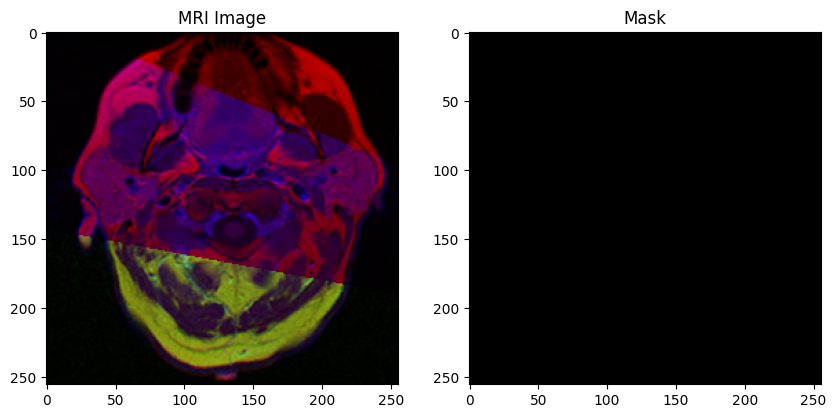

In [73]:
img = Image.open(df.loc[0, 'image'])
mask = Image.open(df.loc[0, 'mask'])

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('MRI Image')
axs[1].imshow(mask, cmap='gray')
axs[1].set_title('Mask')
plt.show()

In [74]:
!pip install albumentations


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [82]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
import numpy as np

transform = A.Compose([
    A.HorizontalFlip(p=0.5), #Lật ngang ảnh
    A.RandomBrightnessContrast(p=0.2), #Thay đổi độ sáng và độ tương phản
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=15, p=0.5), #dịch chuyển, phóng to/thu nhỏ, xoay
    A.ElasticTransform(p=0.1),
    A.Normalize(mean=0, std=1), # chuẩn hóa [0.485, 0.456,0.406], [0.229, 0.224, 0.225]
])

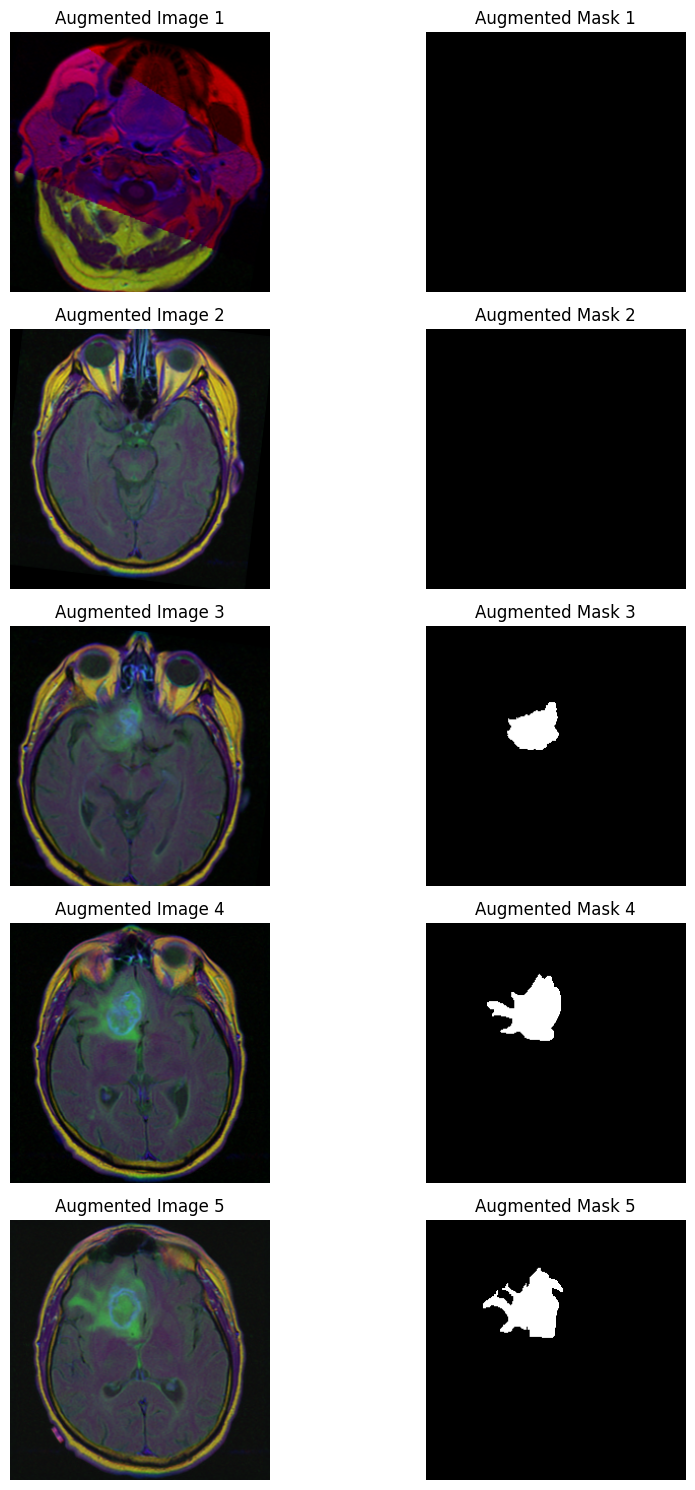

In [83]:
# Select a few images and masks from the dataset
sample_images = df['image'].iloc[:5]
sample_masks = df['mask'].iloc[:5]

# Plot augmented images and masks
fig, axs = plt.subplots(len(sample_images), 2, figsize=(10, 15))

for i, (image_path, mask_path) in enumerate(zip(sample_images, sample_masks)):
    # Load the image and mask
    img = np.array(Image.open(image_path))
    mask = np.array(Image.open(mask_path))
    
    # Apply augmentation
    augmented = transform(image=img, mask=mask)
    img_aug = augmented['image']
    mask_aug = augmented['mask']
    
    # Plot original image and mask
    axs[i, 0].imshow(img_aug)
    axs[i, 0].set_title(f'Augmented Image {i+1}')
    axs[i, 0].axis('off')
    
    axs[i, 1].imshow(mask_aug, cmap='gray')
    axs[i, 1].set_title(f'Augmented Mask {i+1}')
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()

2. Data Augmentation